In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv("/content/drive/MyDrive/datasets/handwritten_mnsit_train/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv("/content/drive/MyDrive/datasets/handwritten_mnsit_test/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

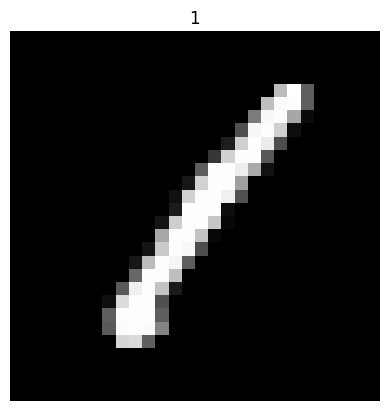

In [5]:
img = X_train.iloc[0].values # Use .values to get the NumPy array
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

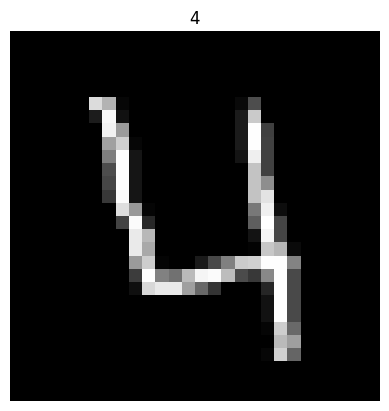

In [6]:
img = X_train.iloc[3].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

**Normalization, Reshape and Label Encoding¶
Normalization**

We perform a grayscale normalization to reduce the effect of illumination's differences.
If we perform normalization, CNN works faster.

Reshape Train and test images (28 x 28)
We reshape all data to 28x28x1 3D matrices.

Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

Label Encoding
Encode labels to one hot vectors

2 => [0,0,1,0,0,0,0,0,0,0]

4 => [0,0,0,0,1,0,0,0,0,0]

In [7]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [8]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [9]:
# Label Encoding
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


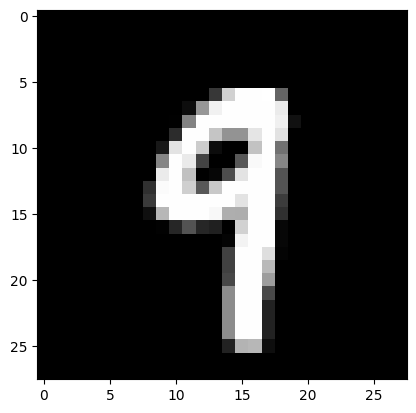

In [11]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [12]:
#
from sklearn.metrics import confusion_matrix
import itertools

# Instead of keras.utils.np_utils, use tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
# Instead of importing from keras.preprocessing.image, import from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [13]:
model = Sequential()
#layer 1
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 2
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [15]:
from keras.optimizers import RMSprop,Adam
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [17]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [18]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [19]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                    epochs = epochs, validation_data = (X_val,Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.4448 - loss: 1.6072 - val_accuracy: 0.9445 - val_loss: 0.2076
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8160 - loss: 0.5193 - val_accuracy: 0.9448 - val_loss: 0.2082
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8376 - loss: 0.5049 - val_accuracy: 0.9636 - val_loss: 0.1229
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8920 - loss: 0.3560 - val_accuracy: 0.9633 - val_loss: 0.1230
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.8902 - loss: 0.3461 - val_accuracy: 0.9686 - val_loss: 0.1006
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3574 - val_accuracy: 0.9686 - val_loss: 0.1006
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.9126 - loss: 0.2800 - val_accuracy: 0.9740 - val_loss: 0.0876
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.2110 - val_acc

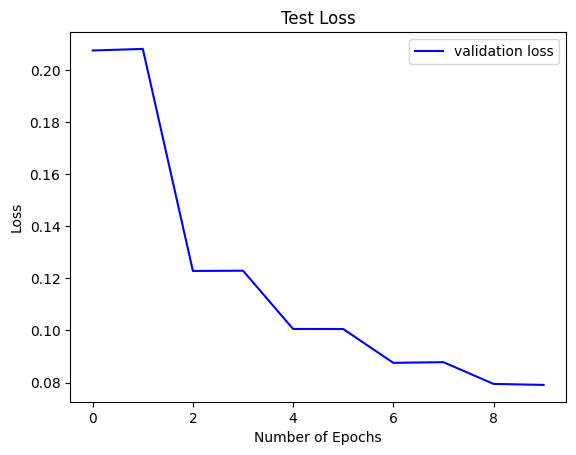

In [20]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


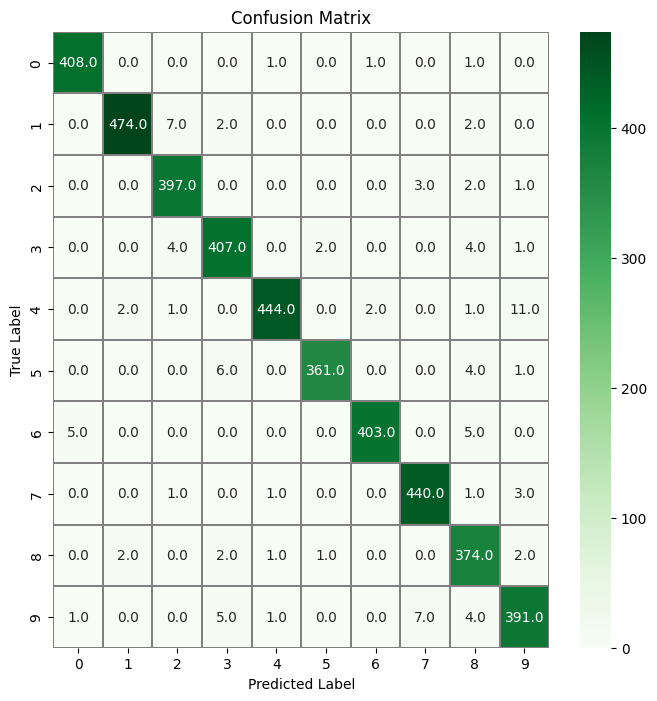

In [21]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

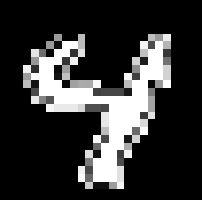

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The prediction classification  [8.6603040e-07 6.6927969e-05 3.6695033e-06 1.2077893e-05 9.9545467e-01
 4.1069907e-05 3.9758838e-06 8.1238960e-04 1.2068885e-03 2.3973882e-03]
The Handwritten Digit is recognised as  4


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2  # Import OpenCV for resizing
from google.colab.patches import cv2_imshow

input_image_path = "/content/mnist_four_digit.png"

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize / 255.0

image_reshaped = np.reshape(input_image_resize, [-1,28,28,1])

input_prediction = model.predict(image_reshaped)

print("The prediction classification ", input_prediction[0])

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)